# Extracting date related featuers 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "../Datasets/online_retail_II.xlsx"

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join them into a single dataframe
# as shown below:

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

data = pd.concat([df_1, df_2])

print(data.shape)

data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [4]:
data["date"] = pd.to_datetime(data["InvoiceDate"])

data[["date", "InvoiceDate"]].head()

,date,InvoiceDate
0,2009-12-01 07:45:00,2009-12-01 07:45:00
1,2009-12-01 07:45:00,2009-12-01 07:45:00
2,2009-12-01 07:45:00,2009-12-01 07:45:00
3,2009-12-01 07:45:00,2009-12-01 07:45:00
4,2009-12-01 07:45:00,2009-12-01 07:45:00


In [ ]:
data["date_part"] = data["date"].dt.date   ## Extract the date part.
time_ = data["date"].dt.time

data["invoice_year"] = data["date"].dt.year  ##  Extract the year
data["invoice_year"].unique()  ## unique values in the year


data["invoice_year_start"] = data["date"].dt.is_year_start  ## year start
data["invoice_year_end"] = data["date"].dt.is_year_end  ## year end


data["invoice_year_leap"] = data["date"].dt.is_leap_year  ## Leap year


data["invoice_quarter"] = data["date"].dt.quarter  ## Extract quarter from date variable - takes values 1 to 4.

data["invoice_month"] = data["date"].dt.month   ## Extract month - 1 to 12.
data["invoice_month"].unique()



# Extract month start and end.
data["invoice_month_start"] = data["date"].dt.is_month_start
data["invoice_month_end"] = data["date"].dt.is_month_end



# Extract week of the year - varies from 1 to 52.
data["invoice_week"] = data["date"].dt.isocalendar().week



# Day of the week - from 0 to 6.
# It is assumed the week starts on Monday,
# denoted by 0, and ends on Sunday, denoted by 6.
data["invoice_dayofweek"] = data["date"].dt.dayofweek




# Was the invoice issued on a weekend?
data["is_weekend"] = data["date"].dt.dayofweek > 4




# Day of the year - 1 to 365.
# I can't imagine when this feature would be
# useful. Maybe, if we had data for several years,
# to identify some repetitive pattern.
data["invoice_day_year"] = data["date"].dt.dayofyear

# Extracting time related featuers 

In [ ]:
data["time_part"] = data["date"].dt.time
data["hour"] = data["date"].dt.hour
data["min"] = data["date"].dt.minute
data["sec"] = data["date"].dt.second



data["microsec"] = data["date"].dt.microsecond
data["nanosec"] = data["date"].dt.nanosecond



# Now, let's repeat what we did in the previous cell in 1 command.
data[["h", "m", "s"]] = pd.DataFrame(
    [(x.hour, x.minute, x.second) for x in data["date"]]
)

In [6]:
###########   Working with different time zones ############# 
# First, let's create a toy dataframe with some timestamps in different time zones.

df = pd.DataFrame()

df["time"] = pd.concat(
    [
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="H", periods=3, tz="Europe/Berlin"
            )
        ),
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="H", periods=3, tz="US/Central"
            )
        ),
    ],
    axis=0,
)

df

,time
0,2014-08-01 09:00:00+02:00
1,2014-08-01 10:00:00+02:00
2,2014-08-01 11:00:00+02:00
0,2014-08-01 09:00:00-05:00
1,2014-08-01 10:00:00-05:00
2,2014-08-01 11:00:00-05:00


In [7]:
# We can see the different timezones indicated by the +2 and -5, with respect to the central meridian.

# To work with different time zones, first we unify the
# timezone to the central one by setting utc = True.

df["time_utc"] = pd.to_datetime(df["time"], utc=True)

# Next, we change all timestamps to the desired timezone,
# e.g., Europe/London, as in this example.

df["time_london"] = df["time_utc"].dt.tz_convert("Europe/London")


df

,time,time_utc,time_london
0,2014-08-01 09:00:00+02:00,2014-08-01 07:00:00+00:00,2014-08-01 08:00:00+01:00
1,2014-08-01 10:00:00+02:00,2014-08-01 08:00:00+00:00,2014-08-01 09:00:00+01:00
2,2014-08-01 11:00:00+02:00,2014-08-01 09:00:00+00:00,2014-08-01 10:00:00+01:00
0,2014-08-01 09:00:00-05:00,2014-08-01 14:00:00+00:00,2014-08-01 15:00:00+01:00
1,2014-08-01 10:00:00-05:00,2014-08-01 15:00:00+00:00,2014-08-01 16:00:00+01:00
2,2014-08-01 11:00:00-05:00,2014-08-01 16:00:00+00:00,2014-08-01 17:00:00+01:00


# Periodic Featuers 

In [8]:
# Let's create a dataframe with the hour
# from 0 to 23.

df = pd.DataFrame([i for i in range(24)], columns=['hour'])
df.head()

,hour
0,0
1,1
2,2
3,3
4,4


In [9]:
# We transform the features with the sine and cosine function.

df["hour_sin"] = np.sin(df["hour"] / df["hour"].max() * 2 * np.pi)

df["hour_cos"] = np.cos(df["hour"] / df["hour"].max() * 2 * np.pi)

df.head()

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.269797,0.962917
2,2,0.519584,0.854419
3,3,0.730836,0.682553
4,4,0.887885,0.460065


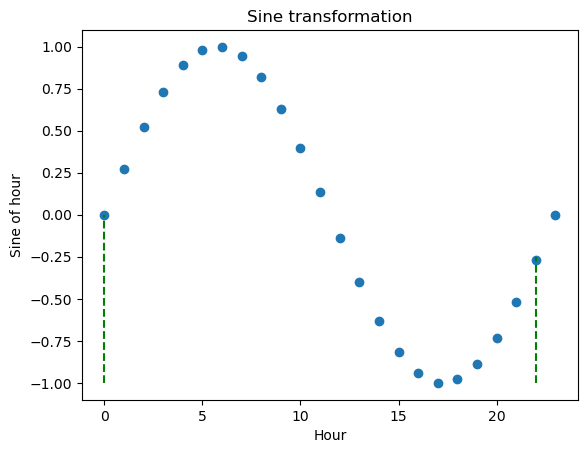

In [10]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])

# Axis labels
plt.ylabel('Sine of hour')
plt.xlabel('Hour')
plt.title('Sine transformation')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=22, ymin=-1, ymax=-0.25, color='g', linestyles='dashed')

* After the transformation we see that the hours 0 and 22 are much closer in value.

* But, we also observe that the different hours could take the same value after the transformation, see below:

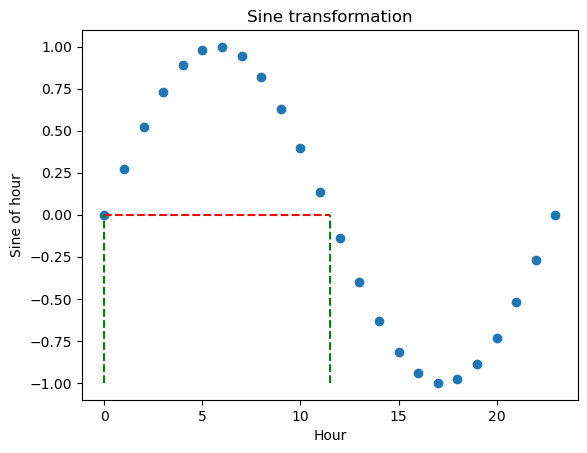

In [11]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])

# Axis labels
plt.ylabel('Sine of hour')
plt.xlabel('Hour')
plt.title('Sine transformation')

plt.hlines(y=0, xmin=0, xmax=11.5, color='r', linestyles='dashed')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=11.5, ymin=-1, ymax=0, color='g', linestyles='dashed')

* In the precedent plot, we see the the hours 0 and 11.5 take roughly the same value after the sin transformation.

* The same is true for the cosine function, see below:

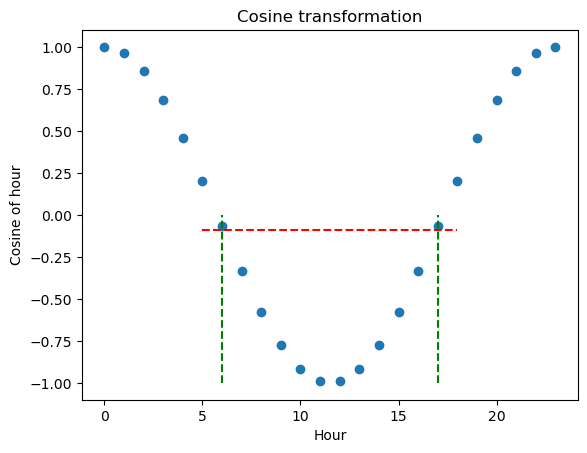

In [12]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_cos"])

# Axis labels
plt.ylabel('Cosine of hour')
plt.xlabel('Hour')
plt.title('Cosine transformation')

plt.hlines(y=-0.09, xmin=5, xmax=18, color='r', linestyles='dashed')

plt.vlines(x=6, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=17, ymin=-1, ymax=0, color='g', linestyles='dashed')

* In the former plot, we see that the hours 6 and 17 take roughly the same cosine value after the transformation.

* How can we distinguish the hours 0 from 11.5 or 6 from 17?

* We need to use the 2 transformations together to fully code the information of the hour. Adding the cosine function, which is out-of-phase with the sine function, breaks the symmetry and gives each hour a unique codification.

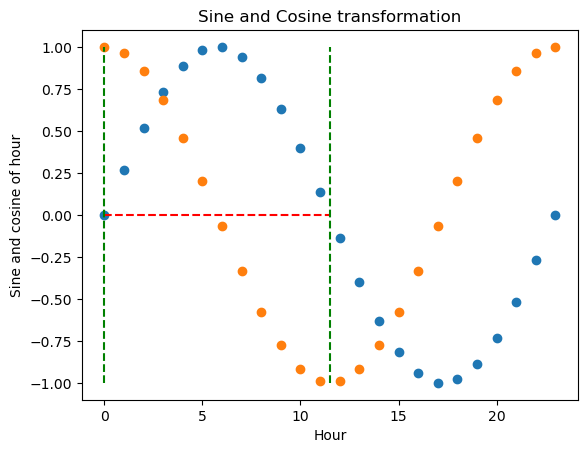

In [13]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])
plt.scatter(df["hour"], df["hour_cos"])

# Axis labels
plt.ylabel('Sine and cosine of hour')
plt.xlabel('Hour')
plt.title('Sine and Cosine transformation')


plt.hlines(y=0, xmin=0, xmax=11.5, color='r', linestyles='dashed')

plt.vlines(x=0, ymin=-1, ymax=1, color='g', linestyles='dashed')
plt.vlines(x=11.5, ymin=-1, ymax=1, color='g', linestyles='dashed')

* With the values of sine 0 and cosine 1, we can unequivocally identify the hour 0. With the values of sine 0 and cosine -1 we can unequivocally identify the hour 11.5 and so on.

* An intuitive way to show the new representation is to plot the sine vs the cosine transformation of the hour. It will show as a 24 hour clock, and now, the distance between two points corresponds to the difference in time as we would expect from a 24-hour cycle.

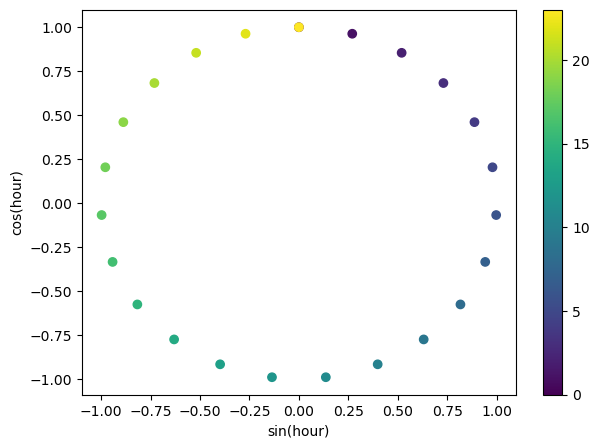

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)",
)
_ = fig.colorbar(sp)

In [15]:
# Now, we can go ahead and apply this transformation to some real data.

In [16]:
# to automate many of our engineering processes
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures

from sklearn.pipeline import Pipeline

In [17]:
# Function to load and prepare input data.

def load_data():

    # Data lives here.
    filename = '../datasets/AirQualityUCI_ready.csv'

    # Load data: only the time variable and CO
    data = pd.read_csv(filename, usecols=['Date_Time', 'CO_sensor'])

    # Cast date variable in datetime format.
    data['Date_Time'] = pd.to_datetime(data['Date_Time'])

    # Set the index to the timestamp.
    data.index = data['Date_Time']

    # Sanity: sort index.
    data.sort_index(inplace=True)

    # Reduce data span.
    data = data[(
        data['Date_Time'] >= '2004-04-01') &
        (data['Date_Time'] <= '2005-04-30')
    ]

    # Remove outliers
    data = data.loc[(data['CO_sensor'] > 0)]

    return data

In [18]:
data = load_data()


ValueError: time data "13/03/2004 00:00:00" doesn't match format "%m/%d/%Y %H:%M:%S", at position 54. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Extract month and hour from timestamp

dtf = DatetimeFeatures(
    variables='Date_Time',  # the timestamp
    features_to_extract=["year", "month", "hour"],  # the features to create
    drop_original=True  # if we want to drop the timestamp.
)

# Extract the datetime features
data = dtf.fit_transform(data)

# Show new variables
data.head()

In [ ]:
# Mean pollutant concentration per hour.

data.groupby(["Date_Time_hour", "Date_Time_month"])["CO_sensor"].mean().unstack().plot(figsize=(8,5))
plt.ylabel("CO concentration")
plt.title("CO concentration in time")

In [ ]:
# Mean pollutant concentration per month.

data.groupby(["Date_Time_month", "Date_Time_year"])["CO_sensor"].mean().unstack().plot(figsize=(8,5))
plt.ylabel("CO concentration")
plt.title("CO concentration in time")

In [ ]:
# Transform hour with sine.

data["hour_sin"] = np.sin(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_hour"], data['hour_sin'])

# Axis labels
plt.xlabel('Hour')
plt.ylabel('Hour - Sine')
plt.title('Sine transformation of hour')

In [19]:
# Transform hour with cosine.
data["hour_cos"] = np.cos(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_hour"], data['hour_cos'])

plt.xlabel('Hour')
plt.ylabel('Hour - Cosine')
plt.title('Cosine transformation of hour')

KeyError: 'Date_Time_hour'

In [ ]:
# Transform month with sine.
data["month_sin"] = np.sin(data["Date_Time_month"] /
                          data["Date_Time_month"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_month"], data['month_sin'])

# Axis labels
plt.xlabel('Month')
plt.ylabel('Month - Sine')
plt.title('Sine transformation of Month')

In [ ]:
# Transform month with cosine.
data["month_cos"] = np.cos(data["Date_Time_month"] /
                          data["Date_Time_month"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_month"], data['month_cos'])

# Axis labels
plt.xlabel('Month')
plt.ylabel('Month - Cosine')
plt.title('Cosine transformation of Month')

### Automate with Feature-engine
* We can extract all the features that we created manually with pandas, automatically, using Feature-engine.

* In particular, for periodic features we can use the CyclicalFeatures.

In [20]:
pipe = Pipeline([
    
    # create datetime features.
    ('datetime', DatetimeFeatures(
        variables="Date_Time",
        features_to_extract=["month", "hour"],
        drop_original=True,
    )),

    # apply sine and cosine transformation.
    ('cyclical', CyclicalFeatures(
        variables=["Date_Time_month", "Date_Time_hour"],
    )),
])

In [ ]:
data = pipe.fit_transform(data)

data.head()

# Highlighting Holidays 

In [22]:
# File path:
file = "../Datasets/online_retail_II.xlsx"

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join them into a single dataframe
# as shown below:

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

df = pd.concat([df_1, df_2])

# Rename columns
df.columns = [
    "invoice",
    "stock_code",
    "description",
    "quantity",
    "invoice_date",
    "price",
    "customer_id",
    "country",
]

# just UK
df = df[df["country"] == "United Kingdom"]

# add revenue variable
df["revenue"] = df["quantity"] * df["price"]

# remove cancelled orders and missing customer ids
df["is_cancelled"] = df["invoice"].apply(lambda x: str(x)[0] == "C")
mask = (~df["customer_id"].isnull()) & (~df["is_cancelled"])

# resample for total daily revenue
df = (
    df.loc[mask, ["invoice_date", "quantity", "revenue"]]
    .resample("D", on="invoice_date")
    .sum()
)

df.head()

,quantity,revenue
invoice_date,,
2009-12-01,21050,37366.32
2009-12-02,25248,45644.67
2009-12-03,47485,66327.53
2009-12-04,18607,31448.44
2009-12-05,4722,9042.36


In [23]:
#############     Highlight specific variables manually    ##################  

import datetime 
# Black Friday dates in 2010 and 2011

black_friday = [datetime.date(2010, 11, 26), datetime.date(2011, 11, 25)]

black_friday

[datetime.date(2010, 11, 26), datetime.date(2011, 11, 25)]

In [24]:
# flag Black Fridays

df["holidays"] = np.where(df.index.isin(black_friday),1,0)

df[df["holidays"]==1]

,quantity,revenue,holidays
invoice_date,,,
2010-11-26,11107,20950.99,1
2011-11-25,25197,22978.56,1


In [26]:
pip install holidays

  Obtaining dependency information for holidays from https://files.pythonhosted.org/packages/32/9f/605a37e5eaff172742068ae660397fcccaa7e1673a5186d1a0ae6f6e990e/holidays-0.48-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 653.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.0 MB 787.7 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.0 MB 845.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.0 MB 893.0 kB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.0 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.0 MB 1.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.0 MB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.4/1.0 MB 1.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.5/1.0 MB 1.3 MB/s eta 0:00:01
   ------------------------ -----------

In [27]:
import holidays
uk_holidays = holidays.UK()

uk_holidays

holidays.country_holidays('GB')

In [28]:
# let's check the holidays available for the UK

for date, name in sorted(holidays.UK(subdiv='UK', years=[2010,2011]).items()):
    print(date, name)

2010-01-01 New Year's Day
2010-04-02 Good Friday
2010-05-03 May Day
2010-05-31 Spring Bank Holiday
2010-12-25 Christmas Day
2010-12-26 Boxing Day
2010-12-27 Christmas Day (observed)
2010-12-28 Boxing Day (observed)
2011-01-01 New Year's Day
2011-01-03 New Year's Day (observed)
2011-04-22 Good Friday
2011-04-29 Wedding of William and Catherine
2011-05-02 May Day
2011-05-30 Spring Bank Holiday
2011-12-25 Christmas Day
2011-12-26 Boxing Day
2011-12-27 Christmas Day (observed)


In [29]:
# let's capture the dates in a list:

uk_holidays = [items[0] for items in holidays.UK(subdiv='UK', years=[2010,2011]).items()]

uk_holidays

[datetime.date(2010, 4, 2),
 datetime.date(2010, 5, 3),
 datetime.date(2010, 5, 31),
 datetime.date(2010, 1, 1),
 datetime.date(2010, 12, 25),
 datetime.date(2010, 12, 27),
 datetime.date(2010, 12, 26),
 datetime.date(2010, 12, 28),
 datetime.date(2011, 4, 22),
 datetime.date(2011, 5, 2),
 datetime.date(2011, 5, 30),
 datetime.date(2011, 4, 29),
 datetime.date(2011, 1, 1),
 datetime.date(2011, 1, 3),
 datetime.date(2011, 12, 25),
 datetime.date(2011, 12, 27),
 datetime.date(2011, 12, 26)]

In [30]:
df["holidays"] = np.where(df.index.isin(uk_holidays),1,0)

df[df["holidays"]==1]

,quantity,revenue,holidays
invoice_date,,,
2010-01-01,0,0.0,1
2010-04-02,0,0.0,1
2010-05-03,0,0.0,1
2010-05-31,0,0.0,1
2010-12-25,0,0.0,1
2010-12-26,0,0.0,1
2010-12-27,0,0.0,1
2010-12-28,0,0.0,1
2011-01-01,0,0.0,1


<img src="../images/Screenshot 2024-05-12 152353.jpg"> 

In [31]:
from pandas.tseries.holiday import (
    Holiday,
    AbstractHolidayCalendar, # provides all the necessary methods to return a list of holidays
    nearest_workday, # rule
    GoodFriday,
    EasterMonday,
    MO, # rule
    FR, # rule
)

In [32]:
# let's create our calendar

class UKHolidays(AbstractHolidayCalendar):
    rules = [
        GoodFriday,
        
        EasterMonday,
        
        Holiday("New Year's Day", month=1, day=1),
        
        Holiday("May Day", month=5, day=1, offset=pd.DateOffset(
            weekday=MO(1))),  # first monday
        
        Holiday("Spring Bank Holiday", month=5, day=31,
                offset=pd.DateOffset(weekday=MO(-1))),  # last monday
        
        Holiday("Black Fridays", month=11, day=25,
                offset=pd.DateOffset(weekday=FR(-1))), # third friday
        
        Holiday("Company's birthday", month=8,
                day=29, observance=nearest_workday),
        
    ]

In [33]:
'''For more information about how MO, TU, WE, TH, FR, SA and SU work, check the library relativedelta.

weekday:

One of the weekday instances (MO, TU, etc) available in the relativedelta module. These instances may receive a parameter N, specifying the Nth weekday, which could be positive or negative (like MO(+1) or MO(-2)). Not specifying it is the same as specifying +1. You can also use an integer, where 0=MO. This argument is always relative e.g. if the calculated date is already Monday, using MO(1) or MO(-1) won't change the day. To effectively make it absolute, use it in combination with the day argument (e.g. day=1, MO(1) for first Monday of the month).'''

"For more information about how MO, TU, WE, TH, FR, SA and SU work, check the library relativedelta.\n\nweekday:\n\nOne of the weekday instances (MO, TU, etc) available in the relativedelta module. These instances may receive a parameter N, specifying the Nth weekday, which could be positive or negative (like MO(+1) or MO(-2)). Not specifying it is the same as specifying +1. You can also use an integer, where 0=MO. This argument is always relative e.g. if the calculated date is already Monday, using MO(1) or MO(-1) won't change the day. To effectively make it absolute, use it in combination with the day argument (e.g. day=1, MO(1) for first Monday of the month)."

In [34]:
# set up the calendar

cal = UKHolidays()

In [35]:
cal.rules

[Holiday: Good Friday (month=1, day=1, offset=[<Easter>, <-2 * Days>]),
 Holiday: Easter Monday (month=1, day=1, offset=[<Easter>, <Day>]),
 Holiday: New Year's Day (month=1, day=1, ),
 Holiday: May Day (month=5, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Spring Bank Holiday (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: Black Fridays (month=11, day=25, offset=<DateOffset: weekday=FR(-1)>),
 Holiday: Company's birthday (month=8, day=29, observance=<function nearest_workday at 0x000001B70EE3E0C0>)]

In [36]:
# find the holiday dates in a certain period of time

uk_holidays = cal.holidays(datetime.datetime(2010, 11, 1), datetime.datetime(2012, 3, 31))

uk_holidays

DatetimeIndex(['2010-11-19', '2011-01-01', '2011-04-22', '2011-04-25',
               '2011-05-02', '2011-05-30', '2011-08-29', '2011-11-25',
               '2012-01-01'],
              dtype='datetime64[ns]', freq=None)

In [37]:
# flag holidays

df["holidays"] = np.where(df.index.isin(uk_holidays),1,0)

df[df["holidays"]==1]

,quantity,revenue,holidays
invoice_date,,,
2010-11-19,18837,30229.20,1
2011-01-01,0,0.00,1
2011-04-22,0,0.00,1
2011-04-25,0,0.00,1
2011-05-02,0,0.00,1
2011-05-30,0,0.00,1
2011-08-29,0,0.00,1
2011-11-25,25197,22978.56,1
